## Classification Problem from Kaggle Using Naive Bayes & Logistic Regression
https://www.kaggle.com/henriqueyamahata/bank-marketing

**Abstract**:

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to `predict if the client will subscribe a term deposit`.

Below I use `Logistic Regression` and `Naive Bayes` to train the model and use some validation tools to see which model performs better.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"  # print out all the output
pd.options.mode.chained_assignment = None # not showing the warning

In [42]:
# read data

dataset = pd.read_csv('bank-additional-full.csv', sep = ';')

# Description of fields

This part is a copy from Kaggle description

### A. bank client data
1. **age** (numeric)
2. **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
3. **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4. **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5. **default**: has credit in default? (categorical: "no","yes","unknown")
6. **housing**: has housing loan? (categorical: "no","yes","unknown")
7. **loan**: has personal loan? (categorical: "no","yes","unknown")

### B. related with the last contact of the current campaign:

8. **contact**: contact communication type (categorical: "cellular","telephone") 
9. **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. **duration**: last contact duration, in seconds (numeric).

### C. other attributes:

12. **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. **previous**: number of contacts performed before this campaign and for this client (numeric)
15. **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### D. social and economic context attributes:

16. **emp.var.rate**: employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx**: consumer price index - monthly indicator (numeric)     
18. **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)     
19. **euribor3m**: euribor 3 month rate - daily indicator (numeric)
20. **nr.employed**: number of employees - quarterly indicator (numeric)

###  Output variable (desired target):

21. **y**: has the client subscribed a term deposit? (binary: "yes","no")

https://www.kaggle.com/henriqueyamahata/bank-marketing

In [43]:
# data info: no null values as all the null values was saved as `unknown`(string)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [44]:
dataset.head(5).T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [45]:
# change `unknown` to null value, and set `yes/no` data into `1/0`

dataset = dataset.replace('unknown', np.NaN)
dataset = dataset.replace('yes', 1)
dataset = dataset.replace('no', 0)
dataset['pdays'] = dataset['pdays'].replace(999, np.NaN)

In [46]:
# take a look at the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null float64
housing           40198 non-null float64
loan              40198 non-null float64
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             1515 non-null float64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(9), int64(5), object(7)
memory u

In [47]:
# drop and fill na value

dataset = dataset.drop(columns = 'pdays') # too many mull data so we drop this column

dataset['job'] = dataset['job'].fillna(dataset['job'].mode()[0])
dataset['education'] = dataset['education'].fillna(dataset['education'].mode()[0])
dataset['default'] = dataset['default'].fillna(dataset['default'].mode()[0])
dataset['housing'] = dataset['housing'].fillna(dataset['housing'].mode()[0])
dataset['loan'] = dataset['loan'].fillna(dataset['loan'].mode()[0])
dataset['marital'] = dataset['marital'].fillna(dataset['marital'].mode()[0])

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null float64
housing           41188 non-null float64
loan              41188 non-null float64
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(8), int64(5), object(7)
memory usage: 6.3+ MB


In [49]:
# transfer data into dummy data

dataset_dum = pd.get_dummies(dataset)

In [50]:
# feature selection method: base on pearsonr corr
# we select only abs(corr) > 0.2

dataset_dum.corr()['y'].abs().sort_values(ascending = False).head(10)
dataset_clean = dataset_dum[['nr.employed', 'euribor3m', 'emp.var.rate', 'poutcome_success', 'duration', 'previous', 'y']]

y                       1.000000
duration                0.405274
nr.employed             0.354678
poutcome_success        0.316269
euribor3m               0.307771
emp.var.rate            0.298334
previous                0.230181
poutcome_nonexistent    0.193507
contact_cellular        0.144773
contact_telephone       0.144773
Name: y, dtype: float64

In [51]:
# take a look at our new data

dataset_clean.sample(10)

,nr.employed,euribor3m,emp.var.rate,poutcome_success,duration,previous,y
20604,5228.1,4.965,1.4,0,536,0,0
39256,5008.7,0.649,-1.8,1,422,1,1
36729,5076.2,1.281,-2.9,0,143,0,0
40070,4991.6,0.810,-1.7,0,414,0,1
7332,5191.0,4.864,1.1,0,139,0,0
19254,5228.1,4.967,1.4,0,102,0,0
27274,5195.8,4.021,-0.1,0,26,0,0
1637,5191.0,4.855,1.1,0,21,0,0
7231,5191.0,4.860,1.1,0,72,0,0
11932,5228.1,4.959,1.4,0,298,0,0


<Figure size 720x504 with 0 Axes>

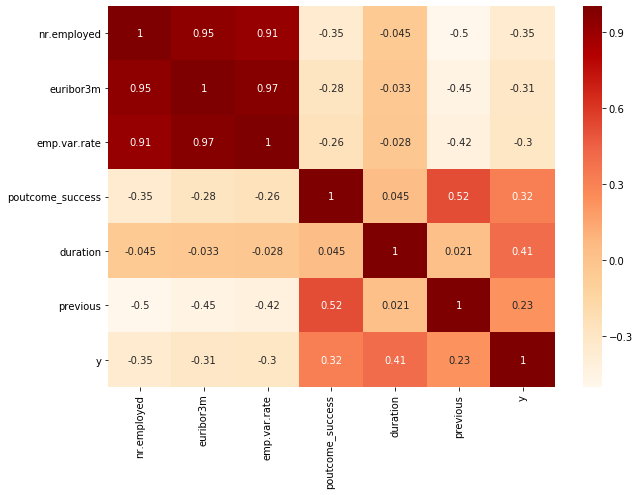

In [52]:
# see the corr for each feature 
# we shall drop features that are highly correlated. 
# eg. for these features: nr.employed & euribor3m & emp.var.rate, we shall only keep one

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(dataset_clean.corr(), 
        xticklabels=dataset_clean.corr().columns,
        yticklabels=dataset_clean.corr().columns, annot = True, cmap = 'OrRd')

plt.show()

# cmap options: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

dataset_clean = dataset_clean.drop(columns = ['nr.employed', 'emp.var.rate'])

Text(0.5, 1.0, 'euribor3m')

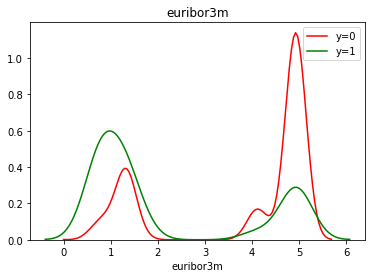

Text(0.5, 1.0, 'previous')

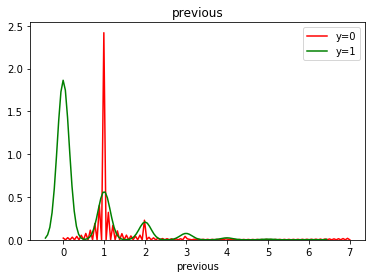

Text(0.5, 1.0, 'duration')

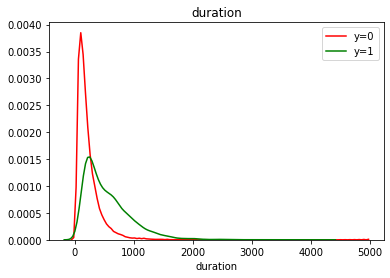

Text(0.5, 1.0, 'poutcome_success')

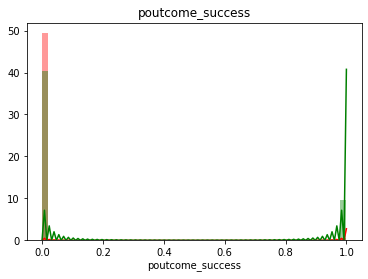

In [53]:
# take a look at the distribtion

sns.distplot(dataset_clean.euribor3m[dataset_clean.y == 0], hist = False, color = 'red', label = 'y=0')
sns.distplot(dataset_clean.euribor3m[dataset_clean.y == 1], hist = False, color = 'green', label = 'y=1')
plt.title('euribor3m')
plt.show()

sns.distplot(dataset_clean['previous'][dataset_clean.y == 0], hist = False, color = 'red', label = 'y=0')
sns.distplot(dataset_clean['previous'][dataset_clean.y == 1], hist = False, color = 'green', label = 'y=1')
plt.title('previous')
plt.show()

sns.distplot(dataset_clean.duration[dataset_clean.y == 0], hist = False, color = 'red', label = 'y=0')
sns.distplot(dataset_clean.duration[dataset_clean.y == 1], hist = False, color = 'green', label = 'y=1')
plt.title('duration')
plt.show()

sns.distplot(dataset_clean.poutcome_success[dataset_clean.y == 0],  color = 'red')
sns.distplot(dataset_clean.poutcome_success[dataset_clean.y == 1],  color = 'green')
plt.title('poutcome_success')
plt.show()

# Preparation for MultinomialNB
as some of our data is categorical data, and we have to transfer continuous data into categorical.

In [54]:
quantile_df = dataset_clean.quantile([.25, .5, .75], axis = 0) 
quantile_df

# since `previous` are from 0 to 7, and majority (> 75%) is 0, so we treat it as a multi-class object 
dataset_clean.previous.value_counts()

dataset_clean['euribor3m_dum'] = 0
dataset_clean['euribor3m_dum'][dataset_clean['euribor3m'] < quantile_df.loc[0.25, 'euribor3m']] = 1
dataset_clean['euribor3m_dum'][(dataset_clean['euribor3m'] >= quantile_df.loc[0.25, 'euribor3m']) & (dataset_clean['euribor3m'] < quantile_df.loc[0.5, 'euribor3m'])] = 2
dataset_clean['euribor3m_dum'][(dataset_clean['euribor3m'] >= quantile_df.loc[0.5, 'euribor3m']) & (dataset_clean['euribor3m'] < quantile_df.loc[0.75, 'euribor3m'])] = 3
dataset_clean['euribor3m_dum'][dataset_clean['euribor3m'] >= quantile_df.loc[0.75, 'euribor3m']] = 4

dataset_clean['duration_dum'] = 0
dataset_clean['duration_dum'][dataset_clean['duration'] < quantile_df.loc[0.25, 'duration']] = 1
dataset_clean['duration_dum'][(dataset_clean['duration'] >= quantile_df.loc[0.25, 'duration']) & (dataset_clean['duration'] < quantile_df.loc[0.5, 'duration'])] = 2
dataset_clean['duration_dum'][(dataset_clean['duration'] >= quantile_df.loc[0.5, 'duration']) & (dataset_clean['duration'] < quantile_df.loc[0.75, 'duration'])] = 3
dataset_clean['duration_dum'][dataset_clean['duration'] >= quantile_df.loc[0.75, 'duration']] = 4

dataset_clean.sample(15)

,euribor3m,poutcome_success,duration,previous,y
0.25,1.344,0.0,102.0,0.0,0.0
0.50,4.857,0.0,180.0,0.0,0.0
0.75,4.961,0.0,319.0,0.0,0.0


0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

,euribor3m,poutcome_success,duration,previous,y,euribor3m_dum,duration_dum
37385,0.879,0,429,0,1,1,4
21065,4.964,0,234,0,0,4,3
7764,4.865,0,119,0,0,3,2
18619,4.968,0,81,0,0,4,1
32676,1.299,0,188,0,0,1,3
33874,1.281,0,64,0,0,1,1
25789,4.120,0,210,0,0,2,3
617,4.857,0,57,0,0,3,1
2960,4.859,0,382,0,0,3,4
15023,4.958,0,181,0,0,3,3


In [55]:
# separate input/ output data

X = dataset_clean.drop(columns = ['y'])
y = dataset_clean['y']

In [56]:
# prepare train/ test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Let's use Logistic Regression

In [65]:
# import library

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix 

# remove duplicate columns

X_train_lr = X_train.drop(columns = ['euribor3m_dum', 'duration_dum'])
X_test_lr = X_test.drop(columns = ['euribor3m_dum', 'duration_dum'])



# fit

logreg = LogisticRegression()
logreg.fit(X_train_lr, y_train)

pred_lr = logreg.predict(X_test_lr)
pred_lr_proba = logreg.predict_proba(X_test_lr)[:,1]

# Validate

accuracy = accuracy_score(y_test, pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, pred_lr).ravel()

recall = tp / (tp + fn)
precision = tp / (tp  + fp)

print('tn =', tn,'fp =', fp,'fn =', fn,'tp =', tp)
print('accuracy = %.3f' % accuracy)
print('recall = %.3f' % recall)
print('precision = %.3f' % precision)

C:\Users\angela\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

tn = 8921 fp = 223 fn = 696 tp = 457
accuracy = 0.911
recall = 0.396
precision = 0.672


[[8921  223]
 [ 696  457]]


Text(0.5, 1.05, 'Confusion matrix of NB classifier')

Text(0, 0, '8921')

Text(0, 1, '696')

Text(1, 0, '223')

Text(1, 1, '457')

[Text(0, 1, ''), Text(0, 1, '0'), Text(0, 1, '1')]

[Text(0, 0, ''), Text(0, 0, '0'), Text(0, 0, '1')]

Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'True')

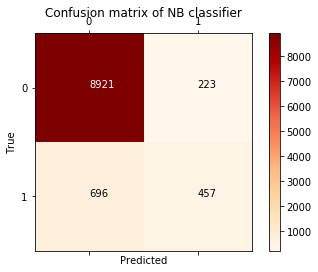

In [63]:
# confusion matrix visualization

labels = [0, 1]
cm = confusion_matrix(y_test, pred_lr, labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm,  cmap = 'OrRd', )
plt.title('Confusion matrix of NB classifier')
fig.colorbar(cax)
plt.annotate(tn,(0,0), color = 'white')
plt.annotate(fn,(0,1))
plt.annotate(fp,(1,0))
plt.annotate(tp,(1,1))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Logistic Regression ROC Curve/ AUC')

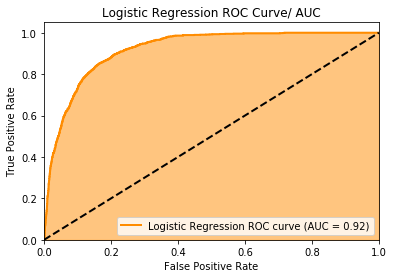

In [71]:
# AUC & ROC

fpr, tpr, thresholds = roc_curve(y_test, pred_lr_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',
         lw = 2, label = 'Logistic Regression ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve/ AUC')
plt.legend(loc = "lower right")
plt.fill_between(fpr, tpr, color = 'darkorange', alpha = 0.5)
plt.show()

## Let's use MultinomialNB Classifer
as some of our data is `categorical` data, and it's easy for us to transfer `continuous` data into `categorical`.

In [66]:
# import library for MultinomialNB and valaidation tool

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix 

# use discrete data

X_train_M = X_train.drop(columns = ['euribor3m', 'duration'])
X_test_M = X_test.drop(columns = ['euribor3m', 'duration'])

# fit

model_M = MultinomialNB()
model_M.fit(X_train_M, y_train)

NB_pred_M = model_M.predict(X_test_M)
NB_pred_M_proba = model_M.predict_proba(X_test_M)[:,1]

# Validate

accuracy = accuracy_score(y_test, NB_pred_M)
tn, fp, fn, tp = confusion_matrix(y_test, NB_pred_M).ravel()

recall = tp / (tp + fn)
precision = tp / (tp  + fp)

print('tn =', tn,'fp =', fp,'fn =', fn,'tp =', tp)
print('accuracy = %.3f' % accuracy)
print('recall = %.3f' % recall)
print('precision = %.3f' % precision)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

tn = 8937 fp = 207 fn = 896 tp = 257
accuracy = 0.893
recall = 0.223
precision = 0.554


[[8937  207]
 [ 896  257]]


Text(0.5, 1.05, 'Confusion matrix of NB classifier')

Text(0, 0, '8937')

Text(0, 1, '896')

Text(1, 0, '207')

Text(1, 1, '257')

[Text(0, 1, ''), Text(0, 1, '0'), Text(0, 1, '1')]

[Text(0, 0, ''), Text(0, 0, '0'), Text(0, 0, '1')]

Text(0.5, 0, 'Predicted')

Text(0, 0.5, 'True')

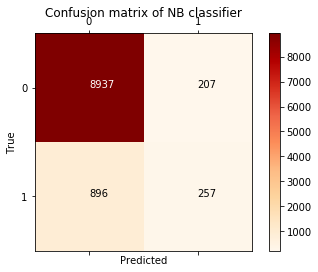

In [60]:
# confusion matrix visualization

labels = [0, 1]
cm = confusion_matrix(y_test, NB_pred_M, labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm,  cmap = 'OrRd', )
plt.title('Confusion matrix of NB classifier')
fig.colorbar(cax)
plt.annotate(tn,(0,0), color = 'white')
plt.annotate(fn,(0,1))
plt.annotate(fp,(1,0))
plt.annotate(tp,(1,1))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Naive Bayes ROC Curve/ AUC')

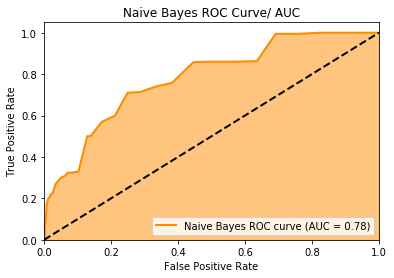

In [70]:
# AUC & ROC

fpr, tpr, thresholds = roc_curve(y_test, NB_pred_M_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange',
         lw = 2, label = 'Naive Bayes ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'black', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve/ AUC')
plt.legend(loc = "lower right")
plt.fill_between(fpr, tpr, color = 'darkorange', alpha = 0.5)
plt.show()

## Conclusion
As Logistic Regression garnered better result in various valiadation indexes, it'd be better to apply LogisticRegression model as the classifier.